# Water Quality Model

The water quality model employs supervised machine learning techniques to classify water as potable (1) or not potable (0), making this a binary classification problem since the output variable is categorical. Supervised learning is a type of machine learning where the model is trained on labeled data. In this context, "labeled data" means that each training example is paired with an output label. The goal of the model is to learn the mapping from inputs to outputs based on the provided labels. 

## Data

The data is stored in a CSV file located in the `data` folder under the name `water_potability.csv`. This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv

The first task involves performing Exploratory Data Analysis (EDA) to identify any discrepancies in the dataset, normalize the data, and visualize it effectively.

In [1]:
# import modules needed

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-06-10 22:38:41.210273: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read csv file and print the first 10 rows
data = pd.read_csv('data/water_potability.csv')
print(data.head(5))

# Number of rows and columns in entire dataset
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns')

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Data has 3276 rows and 10 columns


### Check for the availability and number of NaN values in the dataset

## Why is it important
There are two main reasons why checking for NaN (Not a Number) values is crucial during data preprocessing:

Maintaining Model Stability: Many machine learning algorithms rely on mathematical operations that can't handle NaN values. For instance, dividing by a NaN value would result in an error or unexpected output. By identifying and addressing NaN values, you ensure the smooth operation of these algorithms and prevent errors during training and prediction.

Preserving Data Integrity: NaN values represent missing data points. If left unchecked, they can skew your analysis and lead to inaccurate or misleading results.  Understanding the presence and distribution of NaN values allows you to make informed decisions about how to handle them. You might choose to remove rows with NaN values, impute them with estimated values, or create a separate category for them.

In [3]:
# check for Nan Values in each column
nan_counts = data.isnull().sum()

print(f'Nan Values in each column: {nan_counts}')

Nan Values in each column: ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


From the information above the columns ph, sulfate and Trihalomethanes both have a good number of NaN Values. 

### Replace NaN values with the mean of the column

In [4]:
# Replace NaN values in 'sulfate' and 'Trihalomethanes' with the mean of the respective column
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

print("NaN values after replacement:")
print(data.isnull().sum())

NaN values after replacement:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [5]:
# Validate that the data has no NaN Values
print(data.head(5))

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [6]:
# Separate our data to X -> Feature Columms and Y -> Output Label
X = data.iloc[:, 0:9]
Y = data['Potability']

# Display first few rows of X and Y to verify
print(f'X features: {X.head()}')
print(f'Y target: {Y.head()}')

X features:          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  
Y target: 0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


## Normalize the Data

`Why Normalize?`

- Consistent Scale: Ensures all features contribute equally to the model.
- Improved Performance: Helps gradient-based algorithms converge faster.
-Prevent Bias: Avoids models being biased towards features with larger scales.

`Standard Scaler`

Standard Scaler normalization is a technique used to transform the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This is also known as standardization or Z-score normalization. Formula:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- \( z \) is the standardized value.
- \( x \) is the original value.
- \( \mu \) is the mean of the dataset.
- \( \sigma \) is the standard deviation of the dataset.

`Why Standard Scaler?`

- Standardization: Transforms features to have a mean of 0 and a standard deviation of 1.
- Robust to Different Ranges: Handles features with varying ranges effectively.
- Suitable for Normal Distribution: Aligns well with algorithms assuming normally distributed data.

In [7]:
scaler = StandardScaler()

def normalize_data(X):
    '''
    Normalizes a data
    '''
    normalized_data = scaler.fit_transform(X)
    
    return normalized_data 

X_normalized = normalize_data(X)
print(type(X_normalized))
print(X_normalized[0:3])

<class 'numpy.ndarray'>
[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01  1.12414846e-01
   9.61357416e-01  1.70895423e+00 -1.18065057e+00  1.30614943e+00
  -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 -3.07693708e-01
   3.14598714e-15  2.06257500e+00  2.70597240e-01 -6.38479983e-01
   6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01  1.36059386e+00
   3.14598714e-15 -9.40321148e-02  7.81116857e-01  1.50940884e-03
  -1.16736546e+00]]


### Split the data into training and testing

In [8]:
X = X_normalized

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)


## Building a Neural Network for Binary Classification using tensorflow

In the next cell, we define a function neural_net that constructs and compiles a neural network model using the TensorFlow Keras API. The function takes an optional parameter regularizer, which allows us to apply regularization to the Dense layers in the network. 

In [9]:
def neural_net(regularizer=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (9,)),
        tf.keras.layers.Dense(250, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(125, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    #loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
    model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
    
    return model

### Create an instance of our neural network with no regularization

In [10]:
unregularized_model = neural_net()
unregularized_model.summary()

/Users/kingsleybudu/dev/projects/aquascan_app/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,001 (132.82 KB)

 Trainable params: 34,001 (132.82 KB)

 Non-trainable params: 0 (0.00 B)

### Fit the training data to the Unregularized model

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6124 - loss: 0.6646 - val_accuracy: 0.6265 - val_loss: 0.6355
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.6004 - val_accuracy: 0.6296 - val_loss: 0.6230
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6971 - loss: 0.5925 - val_accuracy: 0.6631 - val_loss: 0.6103
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7021 - loss: 0.5833 - val_accuracy: 0.6448 - val_loss: 0.6103
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5673 - val_accuracy: 0.6570 - val_loss: 0.6016
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5689 - val_accuracy: 0.6570 - val_loss: 0.6177
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7164 - loss: 0.5584 - val_accuracy: 0.6692 - val_loss: 0.6099
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5621 - val_accuracy: 0.6692 - v

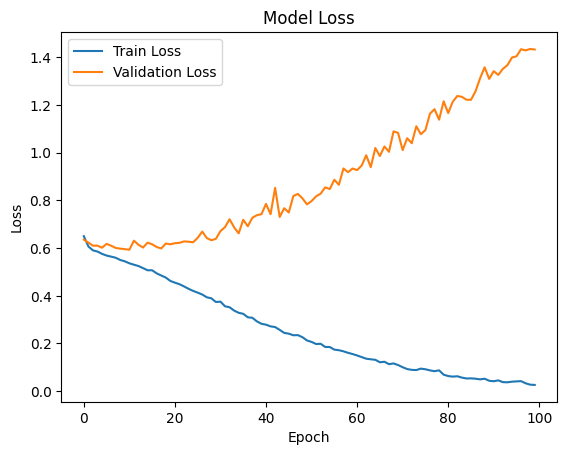

In [11]:
history = unregularized_model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val))

# plot training vs Validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**With respect to the plot and model history above**, the results suggest that our model is overfitting. Why?

- Training Accuracy and Loss: The training accuracy is very high (1.0000), and the training loss is very low (0.0303), indicating that the model has learned the training data very well.

- Validation Accuracy and Loss: The validation accuracy is much lower (0.6601), and the validation loss is significantly higher (1.4780). This large discrepancy between training and validation performance is a clear sign of overfitting.

Overfitting occurs when a model performs well on the training data but fails to generalize to unseen data (validation or test data). 

## How do we address this?

`First` -> implement regularization to the model to penalize large weights and prevent overfitting


### Create a regularized model that uses L2 Regularization and train the model with X_test, Y_test

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6349 - loss: 0.8272 - val_accuracy: 0.6220 - val_loss: 0.7657
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 0.7253 - val_accuracy: 0.6463 - val_loss: 0.7181
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 0.6901 - val_accuracy: 0.6662 - val_loss: 0.6849
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6974 - loss: 0.6557 - val_accuracy: 0.6616 - val_loss: 0.6701
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7130 - loss: 0.6450 - val_accuracy: 0.6479 - val_loss: 0.6794
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - loss: 0.6294 - val_accuracy: 0.6662 - val_loss: 0.6690
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.6189 - val_accuracy: 0.6601 - val_loss: 0.6564
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.6234 - val_accuracy: 0.6646 - v

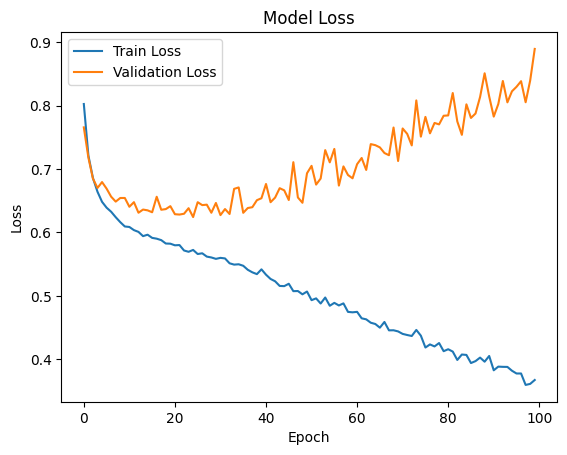

In [12]:
regularizer = tf.keras.regularizers.l2(0.001)
reg_model = neural_net(regularizer)

history = reg_model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The results show some improvement with L2 regularization, but there is still a noticeable gap between the training and validation performance, indicating that overfitting might still be present.

While L2 regularization has helped, we will go furthet to consider additional strategies to further mitigate overfitting. Combining multiple strategies often yields better results.

## Implement Dropout in confluence with L2 Regularization

Our model currently has an accuracy of 89.14% and a loss of 0.34 on the training data and 64.96% accuracy and a loss of 0.86, suggesting a possible case of `Overfitting`. Now let's try to implement early stopping.

Epoch 1/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6074 - loss: 0.9837 - val_accuracy: 0.6189 - val_loss: 0.8796
Epoch 2/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6724 - loss: 0.8181 - val_accuracy: 0.6555 - val_loss: 0.7823
Epoch 3/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6868 - loss: 0.7552 - val_accuracy: 0.6402 - val_loss: 0.7514
Epoch 4/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6711 - loss: 0.7235 - val_accuracy: 0.6448 - val_loss: 0.7327
Epoch 5/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.6875 - val_accuracy: 0.6555 - val_loss: 0.6901
Epoch 6/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6925 - loss: 0.6705 - val_accuracy: 0.6616 - val_loss: 0.6761
Epoch 7/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6817 - loss: 0.6584 - val_accuracy: 0.6540 - val_loss: 0.6689
Epoch 8/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6931 - loss: 0.6373 - val_accuracy: 0.6585 - v

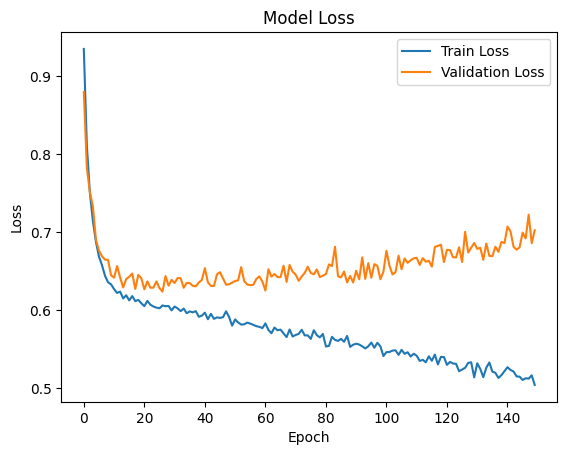

In [23]:
# Define the neural network model with L2 regularization and Dropout
def neural_net_alt(regularizer=None, dropout_rate=0.3):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(9,)),
        tf.keras.layers.Dense(500, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(250, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

regularizer = tf.keras.regularizers.l2(0.001)
dropout_model = neural_net_alt(regularizer)

history = dropout_model.fit(X_train, Y_train, epochs=150, validation_data=(X_val, Y_val))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The results with a 0.3 dropout rate show some improvement, but there is still room for better performance and further reducing the gap between training and validation metrics.

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


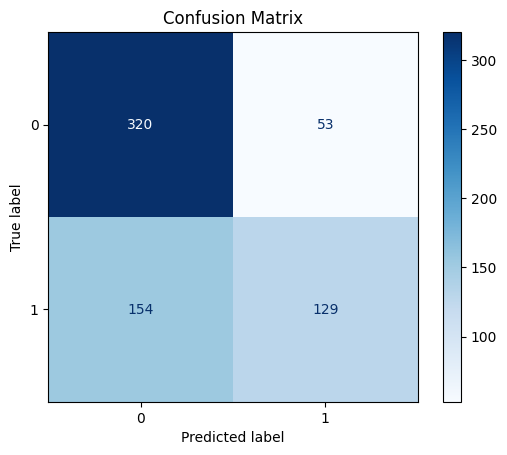

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the validation set
y_val_pred = dropout_model.predict(X_val)
y_val_pred_classes = (y_val_pred > 0.5).astype("int32")

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_val, y_val_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Save Model
from tensorflow import keras

dropout_model.save('model.h5')

## Try a simpler architecture

Epoch 1/100


/Users/kingsleybudu/dev/projects/aquascan_app/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4703 - loss: 0.8564 - val_accuracy: 0.4756 - val_loss: 0.7851
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 0.7632 - val_accuracy: 0.5030 - val_loss: 0.7342
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - loss: 0.7107 - val_accuracy: 0.5366 - val_loss: 0.7134
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 0.6857 - val_accuracy: 0.5564 - val_loss: 0.7032
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5974 - loss: 0.6700 - val_accuracy: 0.5899 - val_loss: 0.6958
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6135 - loss: 0.6667 - val_accuracy: 0.6052 - val_loss: 0.6897
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6082 - loss: 0.6693 - val_accuracy: 0.6098 - val_loss: 0.6855
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6319 - loss: 0.6587 - val_accuracy: 0.6143 - val_loss: 0.6

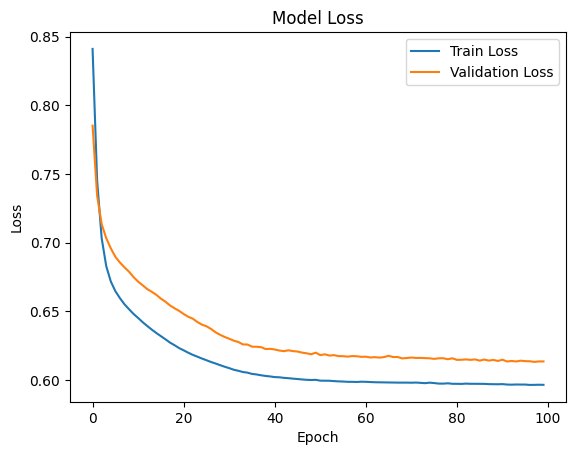

In [16]:
# Define the neural network model with L2 regularization and Dropout
def neural_net_alt(regularizer=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(9,)),
        tf.keras.layers.Dense(5, activation="relu", kernel_regularizer=regularizer),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

regularizer = tf.keras.regularizers.l2(0.001)
dropout_model = neural_net_alt(regularizer)

history = dropout_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Feature Engineering: Correlation Analysis

 Calculate the correlation matrix of your features to identify pairs of highly correlated features. High correlations between features can lead to multicollinearity, which may negatively impact the performance of your model. Consider dropping one of the features from highly correlated pairs to reduce redundancy.

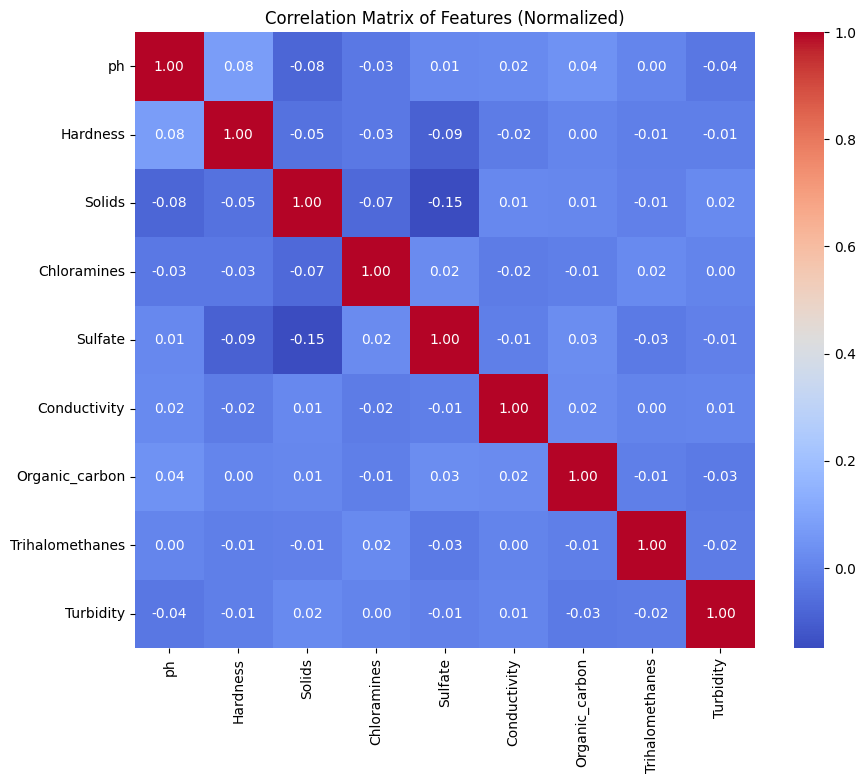

In [27]:
X = data.iloc[:, 0:9]
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Calculate the correlation matrix
correlation_matrix = X_normalized_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features (Normalized)')
plt.show()